# Importing Libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Importing the Data

In [216]:
df = pd.read_csv("expenses.csv")    #https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Examining the Data

Checking the correlations between the variables

In [217]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


There appears to be a high correlation between charges and age. Also there seems to be a large correlation between charges and bmi. 

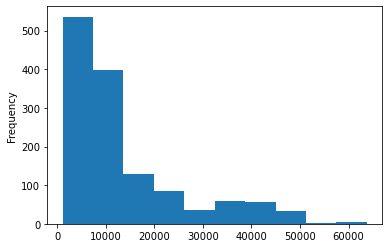

In [218]:
df["charges"].plot.hist()

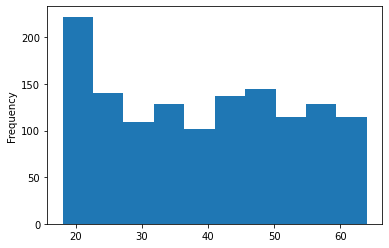

In [219]:
df["age"].plot.hist()

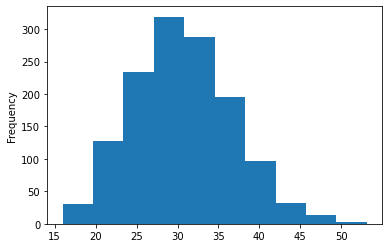

In [220]:
df["bmi"].plot.hist()

Checking on the non-numerical data and seeing what are the impacts on charges. 

In [221]:
region = df.groupby("region").agg("mean").reset_index()
region

,region,age,bmi,children,charges
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.196923,29.199785,1.147692,12417.575374
2,southeast,38.939560,33.355989,1.049451,14735.411438
3,southwest,39.455385,30.596615,1.141538,12346.937377


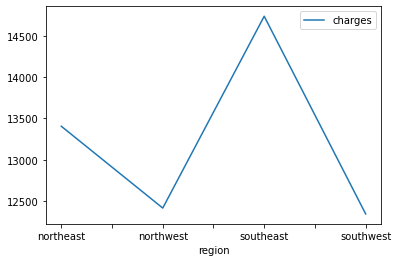

In [222]:
region.plot(x="region", y = "charges")

It appears the South East has a large differnce in charges compared to the other regions. 

In [223]:
Smoker = df[df["smoker"] == "yes"].mean()
Smoker

age            38.514599
bmi            30.708449
children        1.113139
charges     32050.231832
dtype: float64

In [224]:
NonSmoker = df[df["smoker"] == "no"].mean()
NonSmoker

age           39.385338
bmi           30.651795
children       1.090226
charges     8434.268298
dtype: float64

The difference between smoker and non-smokers appeared to be an almost 4x in charges. 

In [225]:
Female = df[df["sex"] == "female"].mean()
Female

age            39.503021
bmi            30.377749
children        1.074018
charges     12569.578844
dtype: float64

In [226]:
Male = df[df["sex"] == "male"].mean()
Male

age            38.917160
bmi            30.943129
children        1.115385
charges     13956.751178
dtype: float64

It appears that on average males have higher charges by about $1,500. 

In [227]:
Children = df.groupby("children").agg("mean").reset_index()
Children

,children,age,bmi,charges
0,0,38.444251,30.550296,12365.975602
1,1,39.453704,30.623148,12731.171832
2,2,39.445833,30.978104,15073.563734
3,3,41.566879,30.684331,15355.318367
4,4,39.000000,31.391200,13850.656311
5,5,35.611111,29.605000,8786.035247


What is suprising is that 5 children has the lowest for all numerical categories. A trend that appears is that as children goes up as the charges also go up. 

# Linear Regression

In [229]:
model = LinearRegression()
model.fit(df[["age","bmi","children"]],df["charges"])
model.coef_

array([239.99447429, 332.0833645 , 542.86465225])

In [230]:
model.intercept_

-6916.243347787044

charges = -6916.24 + 234 * age +  332.08 * bmi + 542.86465225 * children

In [231]:
model.predict([[21,27,0]])

array([7089.89145397])

I plugged in inputs of my own life as I'm 21 years old, have a 27 bmi as I'm 5 feet 10 inches and 190 pounds, and have 0 children. I found out my expected charges would be $7,090. I could lower my expected charges by lowering my bmi which can only be done by losing weight. 

In [232]:
df["charges_predict"] = model.predict(df[["age","bmi","children"]])
df

,age,sex,bmi,children,smoker,region,charges,charges_predict
0,19,female,27.900,0,yes,southwest,16884.92400,6908.777533
1,18,male,33.770,1,no,southeast,1725.55230,9160.977061
2,28,male,33.000,3,no,southeast,4449.46200,12390.946918
3,33,male,22.705,0,no,northwest,21984.47061,8543.527095
4,32,male,28.880,0,no,northwest,3866.85520,10354.147396
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16996.696122
1334,18,female,31.920,0,no,northeast,2205.98080,8003.758184
1335,18,female,36.850,0,no,southeast,1629.83350,9640.929171
1336,21,female,25.800,0,no,southwest,2007.94500,6691.391417


In [233]:
df["residuals"] = df["charges"] - df["charges_predict"]
df

,age,sex,bmi,children,smoker,region,charges,charges_predict,residuals
0,19,female,27.900,0,yes,southwest,16884.92400,6908.777533,9976.146467
1,18,male,33.770,1,no,southeast,1725.55230,9160.977061,-7435.424761
2,28,male,33.000,3,no,southeast,4449.46200,12390.946918,-7941.484918
3,33,male,22.705,0,no,northwest,21984.47061,8543.527095,13440.943515
4,32,male,28.880,0,no,northwest,3866.85520,10354.147396,-6487.292196
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16996.696122,-6396.147822
1334,18,female,31.920,0,no,northeast,2205.98080,8003.758184,-5797.777384
1335,18,female,36.850,0,no,southeast,1629.83350,9640.929171,-8011.095671
1336,21,female,25.800,0,no,southwest,2007.94500,6691.391417,-4683.446417


In [234]:
df["residuals"].sum()

1.4551915228366852e-10

It appears that the multiple linear regression I had produced was representitive of the data as the sum of the residuals is very close to 0. 

# K Means

In [235]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit_predict(df[["charges_predict"]],df["charges"])
kmeans

array([1, 1, 1, ..., 1, 1, 0])

In [236]:
df["cluster"]= kmeans
df

,age,sex,bmi,children,smoker,region,charges,charges_predict,residuals,cluster
0,19,female,27.900,0,yes,southwest,16884.92400,6908.777533,9976.146467,1
1,18,male,33.770,1,no,southeast,1725.55230,9160.977061,-7435.424761,1
2,28,male,33.000,3,no,southeast,4449.46200,12390.946918,-7941.484918,1
3,33,male,22.705,0,no,northwest,21984.47061,8543.527095,13440.943515,1
4,32,male,28.880,0,no,northwest,3866.85520,10354.147396,-6487.292196,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16996.696122,-6396.147822,0
1334,18,female,31.920,0,no,northeast,2205.98080,8003.758184,-5797.777384,1
1335,18,female,36.850,0,no,southeast,1629.83350,9640.929171,-8011.095671,1
1336,21,female,25.800,0,no,southwest,2007.94500,6691.391417,-4683.446417,1


No handles with labels found to put in legend.


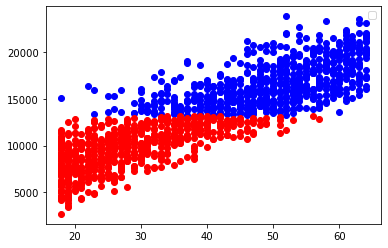

In [237]:
cluster0 = df[df["cluster"] == 0]
cluster1 = df[df["cluster"] == 1]
plt.scatter(cluster0["age"],cluster0["charges_predict"],color = "blue")
plt.scatter(cluster1["age"], cluster1["charges_predict"],color = "red")
plt.xlabel = ("charges")
plt.ylabel= ("charges_predict")
plt.legend()

# Conclusion 

From this analysis the leading factors for payouts in the medical industry are heavily determined by age, children, and bmi. The biggest impact on payouts were the amount of children, followed by bmi, then age. There is a differnce in charges for males as they have an estimated $1,500 larger payout. Now that we understand the payouts and what is causing the higher amounts we can adjust the way payouts are handled and determined as young healthy females appear to have less charges.  